<a href="https://colab.research.google.com/github/parthikydv/Diabetes_Prediction_XAI/blob/main/Diabetes_Prediction_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()   # Choose your extracted diabetes.csv



Saving diabetes.csv to diabetes (3).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['diabetes (3).csv']))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Check missing values
print("Missing values in each column:\n", df.isnull().sum())

# 2. Separate features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 3. Split dataset into train & test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Scale the features (important for ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Training set shape: (537, 8)
Test set shape: (231, 8)


Accuracy: 0.7445887445887446

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231


Confusion Matrix:
 [[130  20]
 [ 39  42]]


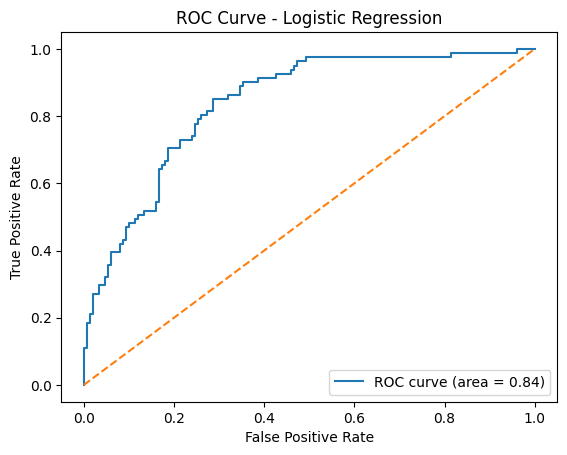

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC Curve
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
 [[130  20]
 [ 37  44]]


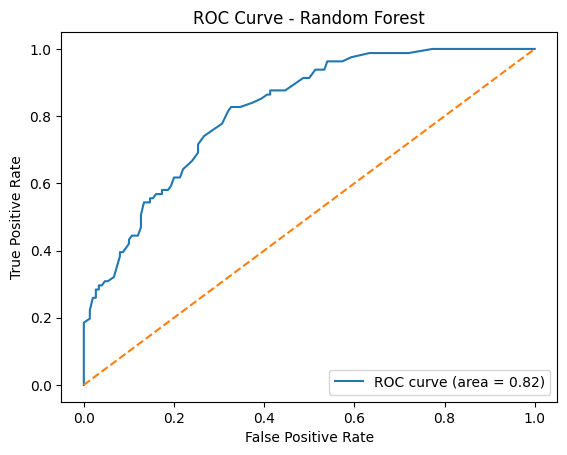

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm_rf)

# ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (area = {roc_auc_rf:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:28:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.57      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
 [[128  22]
 [ 35  46]]


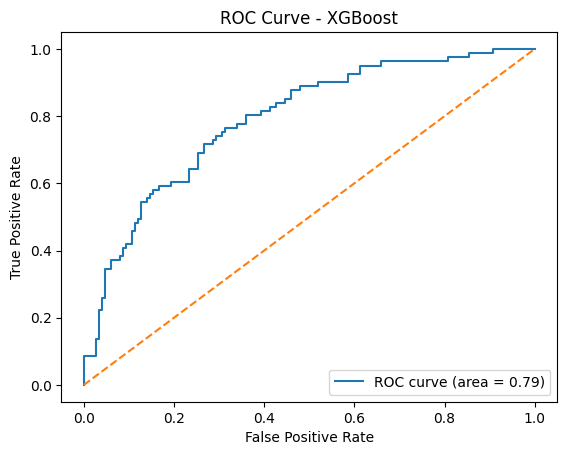

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm_xgb)

# ROC Curve
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC curve (area = {roc_auc_xgb:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import shap

# Create SHAP explainer using TreeExplainer for XGBoost with background data (if needed)
# Let's try with just the model first after update
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_test_scaled)

# Global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary (beeswarm plot)
shap.summary_plot(shap_values, X_test)

# Example: Explanation for 1st patient in test set
shap.plots.waterfall(shap_values[0])

NameError: name 'xgb_model' is not defined

In [ ]:
!pip install lime


In [ ]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns,
    class_names=['Non-Diabetic', 'Diabetic'],
    mode='classification'
)

# Pick one test patient (example: 5th row)
patient_index = 5
exp = explainer.explain_instance(
    X_test_scaled[patient_index],
    xgb_model.predict_proba,   # model's probability predictions
    num_features=6
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or save explanation as HTML (optional)
exp.save_to_file('lime_explanation.html')


In [ ]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.744, 0.753, 0.753],
    "Recall (Diabetic)": [0.52, 0.54, 0.57],
    "Precision (Diabetic)": [0.68, 0.69, 0.68],
    "F1-Score (Diabetic)": [0.59, 0.61, 0.62]
}

df_results = pd.DataFrame(results)
print(df_results)


In [ ]:
plt.figure(figsize=(6,6))

# Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_pred_proba_lr):.2f})")

# Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_pred_proba_rf):.2f})")

# XGBoost
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_score(y_test, y_pred_proba_xgb):.2f})")

# Final Plot
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(6,6))

# Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_pred_proba_lr):.2f})")

# Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_pred_proba_rf):.2f})")

# XGBoost
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_score(y_test, y_pred_proba_xgb):.2f})")

# Final Plot
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
# Replace username and repo with yours
!git clone https://github.com/USERNAME/REPO.git
